# setup

In [1]:
import os

if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('..')

In [2]:
from hparams import BATCH_SIZE, NUM_WORKERS
from utils import get_inputs

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from models.baseline import ResnetBaseline

In [4]:
model_label = 'code15normal'
epochs = 15

from dataloaders.code15 import CODE as DS
from dataloaders.code15 import CODEsplit as DSsplit
from runners.normal import Runner
model = ResnetBaseline(n_classes = 1)

# init

In [5]:
database = DS()
model = torch.load('output/{}/{}.pt'.format(model_label, model_label))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
runner = Runner(device = device, model = model, database = database, split = DSsplit, model_label = model_label)

# disseca

In [7]:
val_dl = torch.utils.data.DataLoader(runner.val_ds, batch_size = BATCH_SIZE, 
                                             shuffle = False, num_workers = NUM_WORKERS)
tst_dl = torch.utils.data.DataLoader(runner.tst_ds, batch_size = BATCH_SIZE, 
                                        shuffle = False, num_workers = NUM_WORKERS)


In [8]:
best_f1s, best_thresholds = runner._synthesis(val_dl, best_thresholds = None)
all_binary_results, all_true_labels, metrics_dict = runner._synthesis(tst_dl, best_thresholds)

erro = (all_true_labels != all_binary_results).cpu()
np.where(erro), erro

100%|██████████| 94/94 [01:04<00:00,  1.45it/s]


((array([    3,     4,     5, ..., 11928, 11934, 11936]),
  array([0, 0, 0, ..., 0, 0, 0])),
 tensor([[False],
         [False],
         [False],
         ...,
         [ True],
         [False],
         [ True]]))

## batch

In [15]:
idx, _ = np.where(erro)
indices = idx[idx < BATCH_SIZE]
indices

array([  3,   4,   5,   7,  11,  12,  15,  21,  26,  27,  32,  33,  34,
        41,  42,  47,  48,  52,  59,  62,  63,  67,  76,  77,  81,  82,
        84,  87,  95,  97,  98, 105, 109, 111, 118, 127])

In [16]:
with torch.no_grad():
    for batch in (tst_dl):
        raw = batch['x']
        label = batch['y']
        ecg = get_inputs(raw, device = 'cpu')
        break

In [20]:
exam_ids = batch['exam_id'][indices]

In [29]:
log = []
for exam_id in exam_ids:
    text = runner.database.metadata['text'].loc[(runner.database.metadata['exam_id'] == exam_id.numpy()).values].values
    log.append(text[0])

## single

In [72]:
indices

array([  3,   4,   5,   7,  11,  12,  15,  21,  26,  27,  32,  33,  34,
        41,  42,  47,  48,  52,  59,  62,  63,  67,  76,  77,  81,  82,
        84,  87,  95,  97,  98, 105, 109, 111, 118, 127])

In [108]:
idx = 5
batches = idx // BATCH_SIZE
idx_batch = idx % BATCH_SIZE

In [33]:
# contador = 0
# with torch.no_grad():
#     for batch in (tst_dl):
#         raw = batch['x']
#         label = batch['y']
#         ecg = get_inputs(raw, device = 'cpu')
#         if contador == batches:
#             break
#         contador += 1

In [109]:
x = raw[idx_batch, :, :]
y = label[idx_batch, :]
exam_id = batch['exam_id'][idx_batch]

In [ ]:
runner.database.metadata['text'].loc[(runner.database.metadata['exam_id'] == exam_id.numpy()).values].values[0]

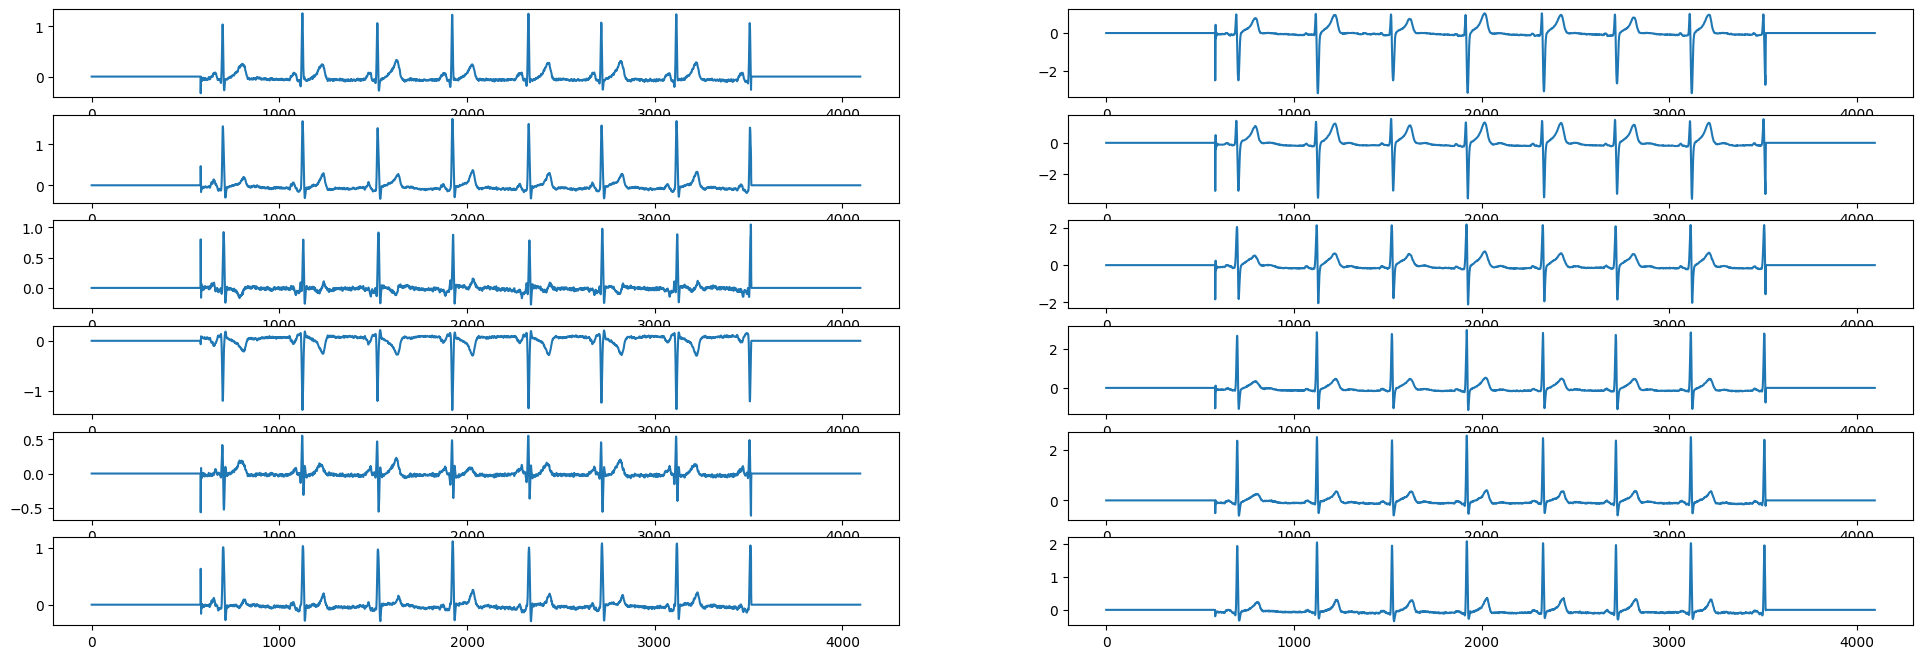

In [111]:
fig, axs = plt.subplots(6, 2, figsize = (24, 8))
for ii in range(12):
    i = ii % 6
    j = ii // 6
    axs[i, j].plot(x[:, ii]);

In [116]:
output_columns = ['1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF', 'normal_ecg', 'interferencia']
runner.database.metadata[output_columns].loc[(runner.database.metadata['exam_id'] == exam_id.numpy()).values]

,1dAVb,RBBB,LBBB,SB,ST,AF,normal_ecg,interferencia
321435,False,False,False,False,False,False,False,False


In [ ]:
runner.database.metadata['text'].loc[(runner.database.metadata['exam_id'] == exam_id.numpy()).values].values[0]